In [1]:
import subprocess
subprocess.call('pip install mwtab', shell=True)

0

In [2]:
%load_ext autoreload
import src.project_fxns.organize_xcms as xcms_fxns
import src.data.preprocessing as preproc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import src.data.data_exploration as explore
import pandas as pd
import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
%autoreload 2


In [3]:
mtbls315_pos = xcms_fxns.Xcms_organize(
        '/home/data/processed/MTBLS315/uhplc_pos/xcms_result.tsv'
)
mtbls315_pos.remove_column_prefix(prefix='X')

# get class to samplename mapping
class_col = 'Factor Value[patient group]'
mtbls315_pos.mtbls_class_mapping(
'/home/data/raw/MTBLS315/a_UPLC_POS_nmfi_and_bsi_diagnosis.txt',
'/home/data/raw/MTBLS315/s_NMFI and BSI diagnosis.txt', 
class_col)

# encode classes as numeric
mtbls315_pos.class_encoder()

Were you expecting 3 classes? because thats how many you have. look at self.sample_classes if this is unexpected


In [4]:
mtbls315_pos.class_dict
no_mal = np.concatenate([mtbls315_pos.class_dict['bacterial bloodstream infection'],
                mtbls315_pos.class_dict['non-malarial febrile illness']])
mal = mtbls315_pos.class_dict['malaria']
new_class_dict = {'malaria': mal, 'non-malarial fever': no_mal}

In [5]:
mtbls315_pos.feature_table

,100.075432918:130.5724,100.111791713:203.2736,100.91639733:45.6545,100.993050242:47.0331,101.008165437:39.0944,101.078669783:131.3189,101.095649335:945.9343,101.09567528:911.90055,101.095628546:1008.97985,101.095615198:974.8181,...,994.377480083:630.4277,994.520108451:630.5829,994.663855991:630.8517,994.676556507:768.2737,994.711878029:1088.5343,994.806739435:630.4151,995.678509494:768.7573,996.642078383:879.4825,997.148884536:50.5859,998.48957211:982.2369
1001_P,4.124568e+04,4559.335425,10515.311682,38648.733397,9.922261e+06,143028.077748,1.117487e+06,7.318810e+05,3.534157e+05,1.065830e+06,...,26196.711572,19110.949173,22247.840612,18149.024556,6261.200917,22621.254276,29839.237864,10744.035883,29166.468399,21550.114535
1002_P,1.609962e+05,7564.583385,19518.114811,66646.047225,2.366362e+05,94980.936472,1.254100e+06,2.108862e+05,1.110922e+06,1.333910e+06,...,34861.625759,28069.457961,28739.672692,3334.598552,1658.139839,13207.837248,3261.719194,6318.615497,24345.438911,27478.652377
1003_P,1.010516e+05,16847.598916,20852.688848,73565.663671,7.021896e+06,98878.411262,2.083945e+06,1.165444e+06,1.098844e+06,1.534413e+06,...,62245.635751,53002.144933,66379.285036,183025.356211,1766.838341,51351.422849,29094.288482,1521.646334,7315.075072,22549.041767
1004_P,1.878054e+05,3809.195651,13274.860513,80341.805688,1.155961e+07,76717.047933,8.845204e+05,7.304386e+05,9.577298e+05,1.338343e+06,...,98086.965666,97156.194831,71840.855259,234576.046160,42136.190378,38274.218876,32460.707996,0.000000,36253.496775,18923.970138
1005_P,2.756288e+04,4935.104360,7155.077796,22357.844412,9.122485e+06,79906.211010,9.480340e+05,1.157906e+06,1.635425e+06,1.061791e+06,...,64699.651105,61597.953881,51722.520059,254126.568567,4307.846401,44321.208296,0.000000,21306.866018,60731.056887,27153.899249
1006_P,6.088004e+06,86401.817081,23812.273844,80174.170292,2.271798e+05,219715.598558,1.149859e+06,1.176853e+06,9.993485e+05,2.699038e+06,...,27635.663893,30350.938760,22075.733844,61229.095711,31504.373458,18956.755556,22847.560086,27971.388513,0.000000,15464.507132
1007_P,8.003690e+04,10143.368962,30196.736697,76783.883707,3.251242e+05,60060.385145,1.189075e+06,1.097152e+06,1.078930e+06,1.275878e+06,...,22061.527667,13221.472695,23359.396577,703974.357187,17033.699489,0.000000,103390.960142,0.000000,25958.988093,32530.282928
1009_P,1.061486e+06,16702.159146,42420.188235,82968.172248,2.514958e+05,71447.264429,9.483942e+05,1.171721e+06,1.492515e+06,1.378631e+06,...,30724.388220,20883.566602,22422.071706,138251.680852,2871.742979,12603.043652,16357.450962,1212.539392,17861.630098,0.000000
1010_P,9.996735e+04,12036.565716,22173.481810,82995.010757,7.787296e+06,65290.220015,1.204461e+06,1.079012e+06,1.045018e+06,1.269189e+06,...,322355.824969,325358.958661,269896.622034,937412.294898,7951.024358,191146.579123,159432.195254,4189.998752,56516.148042,28420.350740
1011_P,8.258854e+04,7336.787830,7668.110141,67607.614566,7.879581e+06,91510.955075,1.120919e+06,2.231713e+06,1.040064e+06,1.410651e+06,...,10865.142632,9987.921912,3183.033782,1441.660315,13250.875060,10363.853655,10042.800115,8759.171496,3456.279728,21768.570526


<h2> Time to explore raw data and preprocess </h2>

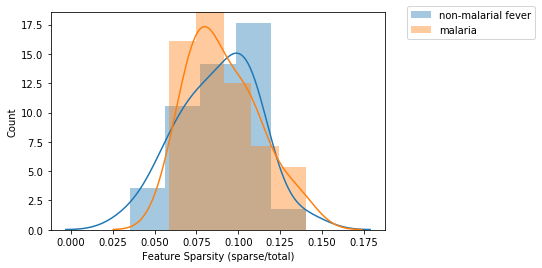

In [12]:
sparse_graph = explore.plot_feature_sparsity(mtbls315_pos.feature_table,
                                            new_class_dict)

In [7]:
print('Original number of nans %s ' % mtbls315_pos.feature_table.isnull().sum().sum())
zero_filled = explore.fill_zero_nan(mtbls315_pos.feature_table, )
zero_filled.isnull().sum().sum()

Original number of nans 0 


0

In [8]:
zero_filled.min(axis=1)

1001_P    217.13836
1002_P    217.13836
1003_P    217.13836
1004_P    217.13836
1005_P    217.13836
1006_P    217.13836
1007_P    217.13836
1009_P    217.13836
1010_P    217.13836
1011_P    217.13836
1012_P    217.13836
1013_P    217.13836
1014_P    217.13836
1016_P    217.13836
1017_P    217.13836
1018_P    217.13836
1019_P    217.13836
1020_P    217.13836
1021_P    217.13836
1023_P    217.13836
1024_P    217.13836
1026_P    217.13836
1027_P    217.13836
1029_P    217.13836
1030_P    217.13836
1031_P    217.13836
1032_P    217.13836
1033_P    217.13836
1034_P    217.13836
1035_P    217.13836
            ...    
1037_P    217.13836
1038_P    217.13836
1039_P    217.13836
1040_P    217.13836
1041_P    217.13836
1042_P    217.13836
1043_P    217.13836
1044_P    217.13836
1045_P    217.13836
1046_P    217.13836
1048_P    217.13836
1049_P    217.13836
1050_P    217.13836
1051_P    217.13836
1052_P    217.13836
1053_P    217.13836
1054_P    217.13836
1055_P    217.13836
1056_P    217.13836


In [9]:
tidy = explore.tidy(zero_filled)
tidy['value'] = np.log10(tidy['value'])

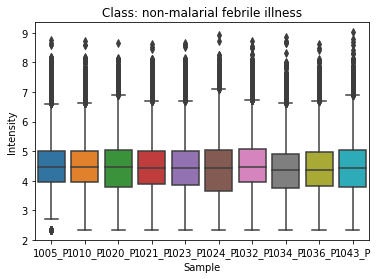

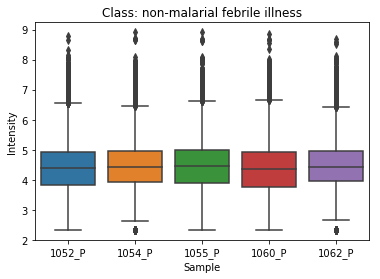

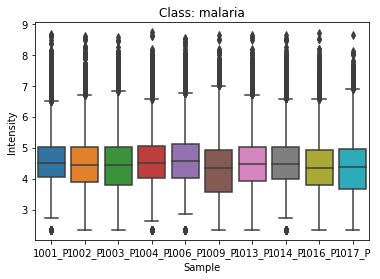

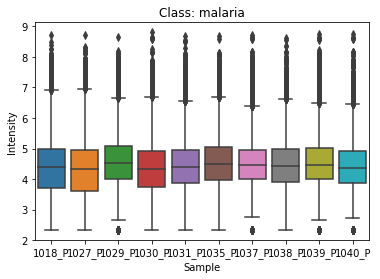

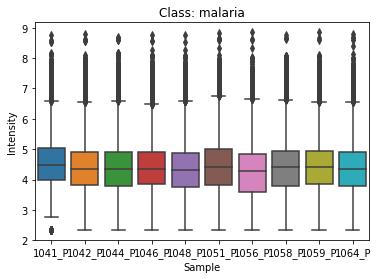

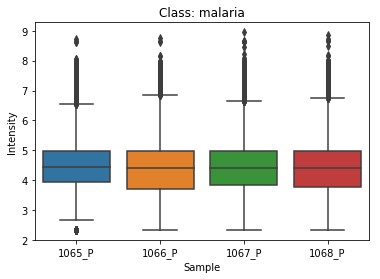

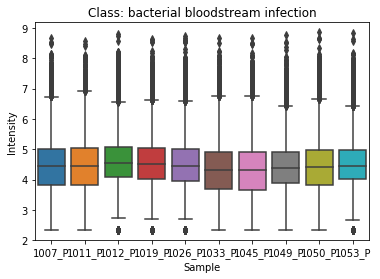

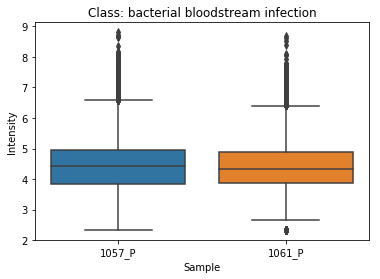

In [10]:
axes = explore.sample_feature_intensity(tidy, 
                                mtbls315_pos.class_dict)

In [10]:
explore.save_axes(axes, '/home/deletable', 
                 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

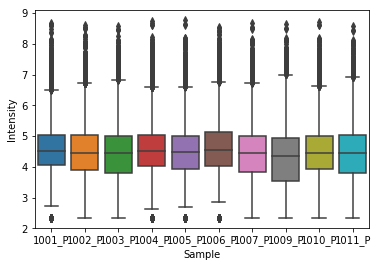

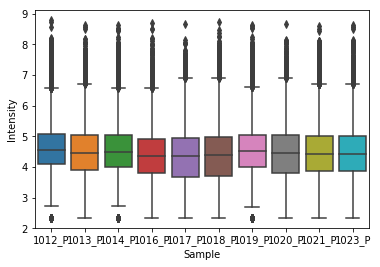

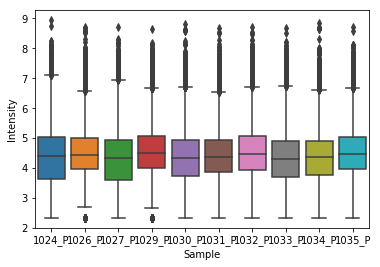

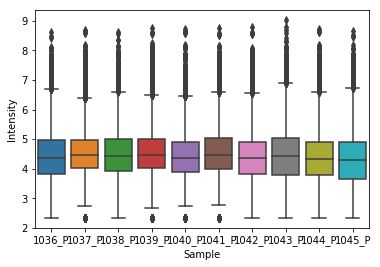

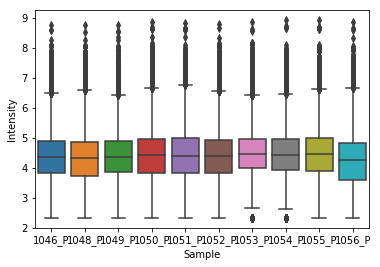

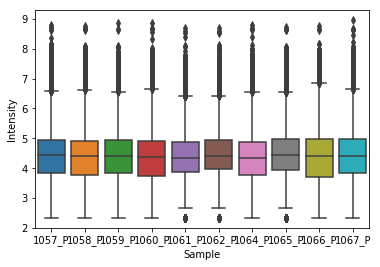

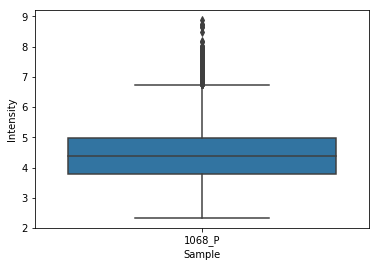

In [11]:
explore.sample_feature_intensity(tidy, plot_type=sns.boxplot)

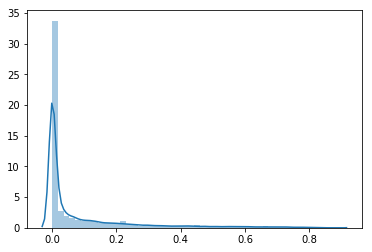

In [53]:
# Plot the sparseness distribution per feature
feat_sparsity = ((mtbls315_pos.feature_table < 1e-15).sum(axis=0)
                / mtbls315_pos.feature_table.shape[0])
explore.distplot_classes(feat_sparsity)

non-malarial fever
malaria


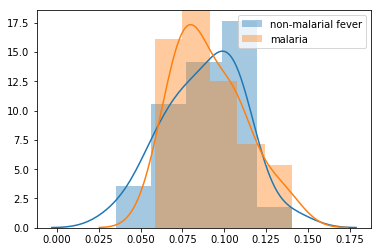

In [51]:
sample_sparsity = ((mtbls315_pos.feature_table < 1e-15).sum(axis=1) 
            / mtbls315_pos.feature_table.shape[1])
explore.distplot_classes(sparsity, new_class_dict)

non-malarial febrile illness
malaria
bacterial bloodstream infection


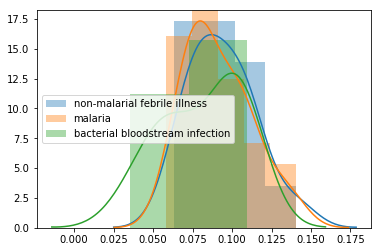

In [48]:
# Sparseness per sample
sparsity = ((mtbls315_pos.feature_table < 1e-15).sum(axis=1) 
            / mtbls315_pos.feature_table.shape[1])

explore.plot_feature_sparsity(mtbls315_pos.feature_table, 
                              mtbls315_pos.class_dict)

non-malarial fever
malaria


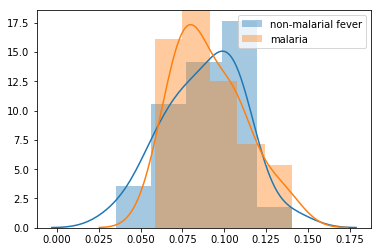

In [47]:
explore.plot_feature_sparsity(mtbls315_pos.feature_table,
                              new_class_dict, 
                              #bins=10
                             )

non-malarial fever
malaria


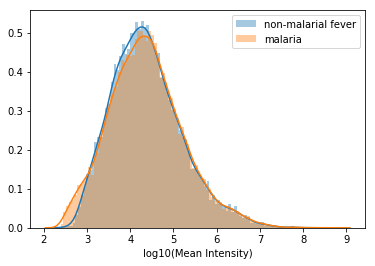

In [41]:
explore.distplot_classes(np.log10(zero_filled),
                         new_class_dict,
                         fxn=np.mean,
                         axlabel='log10(Mean Intensity)',
                        bins=100)

non-malarial febrile illness
malaria
bacterial bloodstream infection


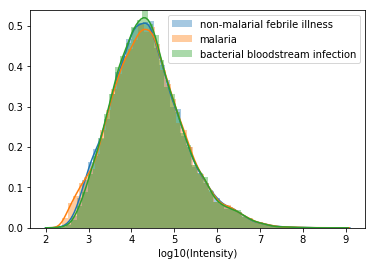

In [14]:
# plot intensities
#sns.distplot(np.log10(zero_filled.mean(axis=0)), bins=100)
explore.plot_mean_intensity(np.log10(zero_filled), 
                            class_dict=mtbls315_pos.class_dict,
                           axlabel='log10(Intensity)')

In [15]:
mw_vals = explore.two_group_stat(zero_filled, new_class_dict,
                       stats.mannwhitneyu)

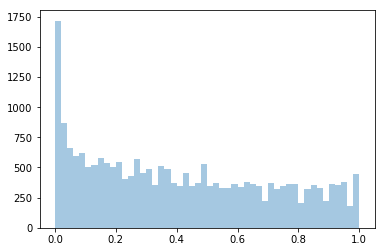

In [16]:
mw_pvals = np.array([i[1] for i in mw_vals])
sns.distplot(mw_pvals*2, bins=50, kde=False)

4.0


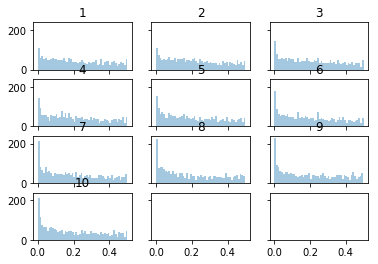

In [18]:
#a = np.array_split(zero_filled.std(axis=0).sort_values(), 6)
ngroups=10
a = np.array_split(zero_filled.std(axis=0).sort_values(), 
                   ngroups)

n_cols=3.0
n_rows= np.ceil(ngroups/n_cols)
print n_rows
fig, axes = plt.subplots(int(n_rows), int(n_cols), 
                         sharex=True, sharey=True)
for i, arr in enumerate(a):
    stratified_mw = mw_vals[arr.index]
    pvals = [val[1] for val in stratified_mw]
    row = int(np.floor(i/n_cols))
    col = int(i%n_cols)
    #print('row: %s col: %s' % (row, col))
    ax = sns.distplot(pvals, bins=50, kde=False, ax=axes[row,col])
    ax.set_title(i+1)
    #plt.title('%.2f to %.2f' % (arr.min(), arr.max()))


In [55]:
mw_pvals = mw_vals.apply(lambda x: x[1])

NameError: name 'mw_vals' is not defined

In [54]:
axes = explore.plot_pvals_stratified(zero_filled, 
                              zero_filled.std(axis=0),
                              mw_pvals*2,
                             'MW pval', ngroups=9)

NameError: name 'mw_pvals' is not defined

In [42]:
for class_label, samples in new_class_dict.iteritems():
    # split by class and plot 
    # mean intensity dist, 
    # intensity-std distribution
    # 
    zero_filled.loc[samples]

In [45]:
np.mean(zero_filled, axis=0)

100.075432918:130.5724      8.024552e+05
100.111791713:203.2736      1.908554e+04
100.91639733:45.6545        1.935106e+04
100.993050242:47.0331       7.715497e+04
101.008165437:39.0944       2.302296e+06
101.078669783:131.3189      1.139960e+05
101.095649335:945.9343      1.325477e+06
101.09567528:911.90055      1.215631e+06
101.095628546:1008.97985    1.161039e+06
101.095615198:974.8181      1.399420e+06
101.095694694:1254.7685     2.700523e+06
101.095693253:1244.447      2.201434e+06
101.095666822:1025.0084     1.562755e+06
101.095601801:957.7579      1.030166e+06
101.095673092:1074.7635     1.599309e+06
101.095684028:1144.4827     1.442147e+06
101.095681595:812.1951      4.850251e+05
101.095640977:994.8119      1.178163e+06
101.095695064:878.8229      9.891524e+05
101.095704125:1111.705      1.174082e+06
101.095692954:1160.8976     1.217025e+06
101.095706591:1129.94795    1.219049e+06
101.095687723:984.8368      1.144841e+06
101.095715891:1175.8072     1.394085e+06
101.095716756:12

In [36]:
covariates = mtbls315_pos.all_data.T.loc[['mz', 'rt',
                            'mzmin', 'mzmax', 'rtmin', 'rtmax']].T
covariates

,mz,rt,mzmin,mzmax,rtmin,rtmax
100.075432918:130.5724,100.075433,130.57240,100.072203,100.078128,128.6014,132.4525
100.111791713:203.2736,100.111792,203.27360,100.111448,100.112040,202.4389,204.3650
100.91639733:45.6545,100.916397,45.65450,100.915915,100.916678,44.0424,49.4263
100.993050242:47.0331,100.993050,47.03310,100.992683,100.993208,46.0313,47.6765
101.008165437:39.0944,101.008165,39.09440,101.002420,101.012186,35.1102,43.8041
101.078669783:131.3189,101.078670,131.31890,101.078432,101.078842,129.2271,132.6766
101.095649335:945.9343,101.095649,945.93430,101.095199,101.095799,938.9658,951.3502
101.09567528:911.90055,101.095675,911.90055,101.095285,101.095862,903.5930,915.5464
101.095628546:1008.97985,101.095629,1008.97985,101.095316,101.095786,1000.7369,1016.4439
101.095615198:974.8181,101.095615,974.81810,101.095172,101.095783,969.2397,980.7654


In [41]:
pca = PCA(n_components=2)
pca_out = pca.fit_transform(zero_filled)

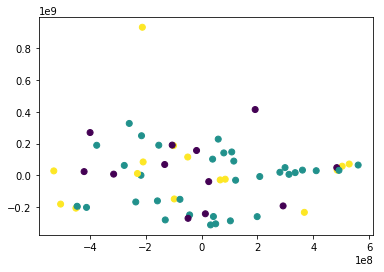

In [125]:
x = [i[0] for i in pca_out]
y = [i[1] for i in pca_out]
ax = plt.scatter(x,y, 
            c=y_coded,
           )


In [90]:
y_coded = le.fit_transform(mtbls315_pos.sample_classes[mtbls315_pos.class_label_col])

In [91]:
le.inverse_transform(y_coded)

array(['malaria', 'malaria', 'malaria', 'malaria',
       'non-malarial febrile illness', 'malaria',
       'bacterial bloodstream infection', 'malaria',
       'non-malarial febrile illness', 'bacterial bloodstream infection',
       'bacterial bloodstream infection', 'malaria', 'malaria', 'malaria',
       'malaria', 'malaria', 'bacterial bloodstream infection',
       'non-malarial febrile illness', 'non-malarial febrile illness',
       'non-malarial febrile illness', 'non-malarial febrile illness',
       'bacterial bloodstream infection', 'malaria', 'malaria', 'malaria',
       'malaria', 'non-malarial febrile illness',
       'bacterial bloodstream infection', 'non-malarial febrile illness',
       'malaria', 'non-malarial febrile illness', 'malaria', 'malaria',
       'malaria', 'malaria', 'malaria', 'malaria',
       'non-malarial febrile illness', 'malaria',
       'bacterial bloodstream infection', 'malaria', 'malaria',
       'bacterial bloodstream infection',
       'bacte

In [88]:
y

array([1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1])